In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Charger les 3 feuilles du fichier Excel dans 3 DataFrames différents
df1 = pd.read_excel("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parc Régionaux", engine="openpyxl", header=3)
df2 = pd.read_excel("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Distance", engine="openpyxl", header=4)
df3 = pd.read_excel("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1.xlsx", sheet_name="Parcours annuel moyen", engine="openpyxl", header=4)

# Propager les valeurs non-NaN dans les colonnes VP, Unnamed: 1 et Unnamed: 2
df2['VP'] = df2['VP'].ffill()
df2['Unnamed: 1'] = df2['Unnamed: 1'].ffill()
df2['Unnamed: 2'] = df2['Unnamed: 2'].ffill()
df3['VP'] = df3['VP'].ffill()
df3['Unnamed: 1'] = df3['Unnamed: 1'].ffill()
df3['Unnamed: 2'] = df3['Unnamed: 2'].ffill()


df1.to_csv("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1_Dis.xlsx", index=False)
df2.to_csv("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1_PAM.xlsx", index=False)
df3.to_csv("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1_PR.xlsx", index=False)

In [74]:
# Afficher les premières lignes de chaque DataFrame pour vérifier
'''print("DF1:")
print(df1.head())
'''
'''
print("\nDF2:")
print(df2.head(15))

'''
print("\nDF3:")
print(df3.head())


DF3:
      VP Unnamed: 1                         Unnamed: 2          2011  \
0  Total      Total                              Total  12920.997408   
1  Total      Total           Electrique et\nhydrogène    6713.97194   
2  Total      Total                  Essence thermique   8394.515111   
3  Total      Total  Essence hybride\nnon rechargeable  16501.709719   
4  Total      Total      Essence hybride\nrechargeable  17703.285305   

           2012          2013          2014          2015          2016  \
0  12830.690278  12726.301855  12725.734852  12730.783291  12760.485575   
1   8822.039199   9066.831413   9307.099739   9673.830428   9818.331108   
2    8233.27699   8125.082885    8139.39222   8214.190897   8374.877599   
3  16062.130445  15996.441776  16159.738569  16292.929907  16292.106737   
4  17204.279421  16789.536979  16349.706069   16075.05933  15973.141154   

           2017          2018          2019          2020          2021  \
0  12658.732108  12516.418604  1256

In [75]:
# Extraire les lignes de 0 à 29
lignes_to_copy = df3.iloc[0:30]

# Insérer ces lignes après la ligne 29, donc dans les lignes 30 à 59
df_with_copied_rows = pd.concat([df3.iloc[:30], lignes_to_copy, df3.iloc[30:]]).reset_index(drop=True)

# Extraire les lignes de 30 à 59
df_lines_30_59 = df_with_copied_rows.iloc[30:60]

# Remplacer "Total" par "Moyennes régionales" dans la colonne "VP" (colonne 0) pour les lignes 30 à 59
df_lines_30_59.loc[:, 'VP'] = df_lines_30_59['VP'].replace('Total', 'Moyennes régionales')

# Diviser les valeurs des colonnes à partir de la 4ème colonne (incluse) par 20
df_lines_30_59 = df_lines_30_59.copy()
df_lines_30_59.loc[:, df_lines_30_59.columns[3:]] = df_lines_30_59.iloc[:, 3:] / 20



# Réinsérer ces lignes modifiées dans le DataFrame
df_with_modifications = pd.concat([df_with_copied_rows.iloc[:30], df_lines_30_59, df_with_copied_rows.iloc[60:]]).reset_index(drop=True)

#Afficher les premières lignes pour vérifier
print(df_with_copied_rows.iloc[25:60]) 

df_with_modifications.to_csv("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/parc_vp_region_2024_1_Dis_V2.xlsx", index=False)

                     VP      Unnamed: 1                         Unnamed: 2  \
25                Total    particuliers                   Diesel thermique   
26                Total    particuliers   Diesel hybride non\nrechargeable   
27                Total    particuliers       Diesel hybride\nrechargeable   
28                Total    particuliers                                Gaz   
29                Total    particuliers                      Non déterminé   
30  Moyennes régionales           Total                              Total   
31  Moyennes régionales           Total           Electrique et\nhydrogène   
32  Moyennes régionales           Total                  Essence thermique   
33  Moyennes régionales           Total  Essence hybride\nnon rechargeable   
34  Moyennes régionales           Total      Essence hybride\nrechargeable   
35  Moyennes régionales           Total                   Diesel thermique   
36  Moyennes régionales           Total   Diesel hybride non\nre

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données dans un DataFrame
df_km_tot = df_with_modifications.iloc[:10].reset_index(drop=True)

# Renommer les colonnes pour éviter les "Unnamed"
df_km_tot.rename(columns={"Unnamed: 1": "Statut", "Unnamed: 2": "Carburant"}, inplace=True)

# Filtrer pour exclure la ligne "Total" et "Non déterminé" dans la colonne "Carburant"
df_km_tot = df_km_tot[df_km_tot["Carburant"] != "Total"]
df_km_tot = df_km_tot[df_km_tot["Carburant"] != "Non déterminé"]

# Sélectionner les années (colonnes à partir de la 4ᵉ colonne)
years = df_km_tot.columns[3:]

# Dictionnaire des nombres de véhicules par type de carburant
nb_vehicules = {
    'Diesel thermique': 4445,
    'Essence thermique': 3610,
    'Gaz': 2422,
    'Essence hybride\nnon rechargeable': 1482,
    'Electrique et\nhydrogène': 1244,
    'Essence hybride\nrechargeable': 902,
    'Diesel hybride\nrechargeable': 425,
    'Diesel hybride non\nrechargeable': 496
}

# Calcul de la moyenne pondérée totale pour chaque année
moyenne_ponderee_totale = []

for year in years:
    numerateur = 0
    denominateur = 0

    for _, row in df_km_tot.iterrows():
        carburant = row["Carburant"]
        if carburant in nb_vehicules:
            numerateur += row[year] * nb_vehicules[carburant]
            denominateur += nb_vehicules[carburant]

    moyenne_ponderee_totale.append(numerateur / denominateur if denominateur != 0 else 0)



On regroupe par type de véhicule : 
- électriques et hydrogènes --> VE
- essence et diesel rechargeable --> VHR
- le reste sans Non déterminé --> Thermiques 
Pour regrouper, on fait des moyennes pondérées du kilométrage par le nombre de voiture de chaque type.
Par exemple pour avoir la moyenne sur les VHR : on calcule la moyenne des kilométrages des véhicules à essence hybride rechargeable et diesel hybride rechargeable pondérée par le nombre de véhicule de chaque type.


In [77]:
df1['Carburant'].value_counts()

Carburant
Diesel thermique                    4445
Essence thermique                   3610
Gaz                                 2422
Non déterminé                       1641
Essence hybride non rechargeable    1482
Electrique et hydrogène             1244
Essence hybride rechargeable         902
Diesel hybride non rechargeable      496
Diesel hybride rechargeable          425
Name: count, dtype: int64

In [78]:
import pandas as pd

# Dictionnaire des nombres de véhicules
nb_vehicules = {
    'Diesel thermique': 4445,
    'Essence thermique': 3610,
    'Gaz': 2422,
    'Essence hybride\nnon rechargeable': 1482,
    'Electrique et\nhydrogène': 1244,
    'Essence hybride\nrechargeable': 902,
    'Diesel hybride\nrechargeable': 425,
    'Diesel hybride non\nrechargeable': 496
}

# Définir les années
annees = list(range(2011, 2024))

# Initialiser le DataFrame résultat
resultats = pd.DataFrame(index=['VE', 'VHR', 'Thermiques'], columns=annees)

# Pour chaque année
for annee in annees:
    # VE (Electrique et hydrogène)
    resultats.loc['VE', annee] = df3[df3['Unnamed: 2'] == 'Electrique et\nhydrogène'][annee].values[0]
    
    # VHR (moyenne pondérée des rechargeables)
    km_essence_rech = df3[df3['Unnamed: 2'] == 'Essence hybride\nrechargeable'][annee].values[0]
    km_diesel_rech = df3[df3['Unnamed: 2'] == 'Diesel hybride\nrechargeable'][annee].values[0]
    
    resultats.loc['VHR', annee] = (
        (km_essence_rech * nb_vehicules['Essence hybride\nrechargeable'] +
         km_diesel_rech * nb_vehicules['Diesel hybride\nrechargeable']) /
        (nb_vehicules['Essence hybride\nrechargeable'] + 
         nb_vehicules['Diesel hybride\nrechargeable'])
    )
    
    # Thermiques (le reste)
    types_thermiques = [
        'Diesel thermique', 
        'Essence thermique',
        'Gaz',
        'Essence hybride\nnon rechargeable',
        'Diesel hybride non\nrechargeable'
    ]
    
    numerateur = sum(
        df3[df3['Unnamed: 2'] == type_][annee].values[0] * nb_vehicules[type_]
        for type_ in types_thermiques
    )
    denominateur = sum(nb_vehicules[type_] for type_ in types_thermiques)
    
    resultats.loc['Thermiques', annee] = numerateur / denominateur

# 🔹 Ajout de la ligne Moyenne pondérée totale
total_vehicules = sum(nb_vehicules.values())

for annee in annees:
    resultats.loc['Moyenne Totale', annee] = (
        (resultats.loc['VE', annee] * nb_vehicules['Electrique et\nhydrogène'] +
         resultats.loc['VHR', annee] * 
         (nb_vehicules['Essence hybride\nrechargeable'] + nb_vehicules['Diesel hybride\nrechargeable']) +
         resultats.loc['Thermiques', annee] * 
         sum(nb_vehicules[type_] for type_ in types_thermiques))
        / total_vehicules
    )

# 🔹 Afficher les résultats
print(resultats)

                        2011          2012          2013          2014  \
VE                6713.97194   8822.039199   9066.831413   9307.099739   
VHR             20280.977163  18881.285201  17698.845435  17275.279393   
Thermiques      13362.748003  13228.440255  13083.715058  13001.933434   
Moyenne Totale  13423.270609  13362.858086  13158.736671  13073.433299   

                        2015          2016          2017          2018  \
VE               9673.830428   9818.331108  10266.440936  10679.443491   
VHR             17811.312013  18219.406237  18488.735003  18719.272346   
Thermiques      12948.455998  12946.253238  12799.124091  12652.093436   
Moyenne Totale  13106.806572  13152.984164  13091.913645   13024.59243   

                        2019          2020          2021          2022  \
VE              11516.889416   9407.754901  10951.351778  12622.126829   
VHR             19501.430306  15487.034914  17635.866345  20559.062928   
Thermiques      12670.683152  10236.

In [79]:
df1['Carburant'].unique()

array(['Diesel hybride non rechargeable', 'Diesel hybride rechargeable',
       'Diesel thermique', 'Electrique et hydrogène',
       'Essence hybride non rechargeable', 'Essence hybride rechargeable',
       'Essence thermique', 'Gaz', 'Non déterminé'], dtype=object)

In [80]:
def transform_dataframes(df1_long, df3_long):
    # Mapping pour harmoniser les valeurs
    region_mapping = {
        'Inconnu': 'Inconnue',
        "Provence-Alpes-Côte\nd'Azur": "Provence-Alpes-Côte d'Azur"
    }
    
    carburant_mapping = {
        'Electrique et\nhydrogène': 'Electrique et hydrogène',
        'Essence hybride\nnon rechargeable': 'Essence hybride non rechargeable', 
        'Essence hybride\nrechargeable': 'Essence hybride rechargeable',
        'Diesel hybride non\nrechargeable': 'Diesel hybride non rechargeable',
        'Diesel hybride\nrechargeable': 'Diesel hybride rechargeable'
    }
    
    statut_mapping = {
        'professionnels': 'Professionnel', 
        'particuliers': 'Particulier'
    }
    
    # Appliquer les mappings
    df1_long['Région de résidence'] = df1_long['Région de résidence'].replace(region_mapping)
    df3_long['Région de résidence'] = df3_long['Région de résidence'].replace(region_mapping)
    
    df1_long['Carburant'] = df1_long['Carburant'].replace(carburant_mapping)
    df3_long['Carburant'] = df3_long['Carburant'].replace(carburant_mapping)
    
    df1_long['Statut de l\'utilisateur'] = df1_long['Statut de l\'utilisateur'].replace(statut_mapping)
    df3_long['Statut de l\'utilisateur'] = df3_long['Statut de l\'utilisateur'].replace(statut_mapping)
    
    # Filtrer les lignes "Total"
    df1_long = df1_long[df1_long['Région de résidence'] != 'Total']
    df3_long = df3_long[df3_long['Région de résidence'] != 'Total']
    df1_long = df1_long[df1_long['Carburant'] != 'Total']
    df3_long = df3_long[df3_long['Carburant'] != 'Total']
    df1_long = df1_long[df1_long['Statut de l\'utilisateur'] != 'Total']
    df3_long = df3_long[df3_long['Statut de l\'utilisateur'] != 'Total']
    
    # Fusionner les DataFrames
    df_final = df1_long.merge(
        df3_long, 
        on=['Année', 'Région de résidence', 'Statut de l\'utilisateur', 'Carburant'],
        how='inner'
    )
    
    # Sélectionner et renommer les colonnes
    df_final = df_final[[
        'Année', 'Région de résidence', 'Statut de l\'utilisateur', 
        'Carburant', 'Nombre de véhicules', 'Kilométrage'
    ]]

    df_final = df_final[df_final["Carburant"] != "Non déterminé"]
    
    return df_final

# Exemple d'utilisation
import pandas as pd

# Supposons que df1 et df3 soient déjà chargés

# Suppression de la colonne 2024 si présente dans df1
df1 = df1.drop(columns=[2024], errors='ignore')

# Renommage des colonnes de df3 pour harmonisation
df3 = df3.rename(columns={
    'VP': 'Région de résidence',
    'Unnamed: 1': "Statut de l'utilisateur",
    'Unnamed: 2': 'Carburant'
})

# Suppression des lignes contenant "Total"
df1 = df1[~df1['Région de résidence'].str.contains("Total", na=False)]
df3 = df3[~df3['Région de résidence'].str.contains("Total", na=False)]
df3 = df3[~df3['Carburant'].str.contains("Total", na=False)]

# Nettoyage des espaces et caractères spéciaux
df1['Région de résidence'] = df1['Région de résidence'].str.strip()
df3['Région de résidence'] = df3['Région de résidence'].str.strip()

df1['Carburant'] = df1['Carburant'].str.replace(r'\s+', ' ', regex=True)
df3['Carburant'] = df3['Carburant'].str.replace(r'\s+', ' ', regex=True)

# Transformation des DataFrames en format long
df1_long = df1.melt(
    id_vars=['Région de résidence', 'Code région de résidence', 'Carburant', 'Âge', 'Statut de l\'utilisateur', 'Crit\'Air'], 
    var_name='Année', value_name='Nombre de véhicules'
)

df3_long = df3.melt(
    id_vars=['Région de résidence', 'Statut de l\'utilisateur', 'Carburant'],
    var_name='Année', value_name='Kilométrage'
)

# Conversion des années en string pour correspondance
df1_long['Année'] = df1_long['Année'].astype(str)
df3_long['Année'] = df3_long['Année'].astype(str)

# Affichage rapide pour vérifier
print(df1_long.head())
print(df3_long.head())

# Maintenant tu peux appliquer :
df_final = transform_dataframes(df1_long, df3_long)

  Région de résidence  Code région de résidence  \
0            Inconnue                         0   
1            Inconnue                         0   
2            Inconnue                         0   
3            Inconnue                         0   
4            Inconnue                         0   

                         Carburant    Âge Statut de l'utilisateur Crit'Air  \
0  Diesel hybride non rechargeable   0 an             Particulier        2   
1  Diesel hybride non rechargeable   0 an           Professionnel        2   
2  Diesel hybride non rechargeable   1 an             Particulier        2   
3  Diesel hybride non rechargeable   1 an           Professionnel        2   
4  Diesel hybride non rechargeable  2 ans             Particulier        2   

  Année  Nombre de véhicules  
0  2011                  0.0  
1  2011                  0.0  
2  2011                  0.0  
3  2011                  0.0  
4  2011                  0.0  
  Région de résidence Statut de l'util

In [81]:
df1_long = df1_long[['Région de résidence', "Statut de l'utilisateur", 'Carburant', 'Année', 'Nombre de véhicules']]

In [82]:
# Regrouper les carburants par type de véhicule
def categoriser_carburant(carburant):
    if carburant in ['Electrique et hydrogène']:
        return 'VE'  # Véhicule Electrique ou Hydrogène
    elif carburant in ['Essence hybride rechargeable', 'Diesel hybride rechargeable']:
        return 'VHR'  # Véhicule Hybride Rechargeable
    else:
        return 'Thermiques'  # Véhicule thermique

# Appliquer la fonction de catégorisation à la colonne 'Carburant'
df_final['Type de véhicule'] = df_final['Carburant'].apply(categoriser_carburant)

# Regrouper les carburants par type de véhicule
def categoriser_carburant(carburant):
    if carburant in ['Electrique et hydrogène']:
        return 'VE'  # Véhicule Electrique ou Hydrogène
    elif carburant in ['Essence hybride rechargeable', 'Diesel hybride rechargeable']:
        return 'VHR'  # Véhicule Hybride Rechargeable
    else:
        return 'Thermiques'  # Véhicule thermique

# Appliquer la fonction de catégorisation à la colonne 'Carburant'
df_final['Type de véhicule'] = df_final['Carburant'].apply(categoriser_carburant)

In [100]:
df_final
df_final.to_csv("C:/Users/louak/OneDrive/Desktop/Statapp/Bases/df_parc_kilometrage_statut.csv")

In [84]:
df_final.columns

Index(['Année', 'Région de résidence', 'Statut de l'utilisateur', 'Carburant',
       'Nombre de véhicules', 'Kilométrage', 'Type de véhicule'],
      dtype='object')

In [85]:
# Convertir en nombres pour éviter les erreurs de type
df_final["Kilométrage"] = pd.to_numeric(df_final["Kilométrage"], errors="coerce")
df_final["Nombre de véhicules"] = pd.to_numeric(df_final["Nombre de véhicules"], errors="coerce")

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour calculer les métriques
def compute_metrics(groupby_var):
    df_grouped = df_final.groupby(groupby_var).apply(
        lambda x: pd.Series({
            "Kilométrage total pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum(),
            "Kilométrage moyen pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum() / x["Nombre de véhicules"].sum()
        })
    ).reset_index()
    return df_grouped.sort_values("Kilométrage moyen pondéré", ascending=False)

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2299372384.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_final.groupby(groupby_var).apply(


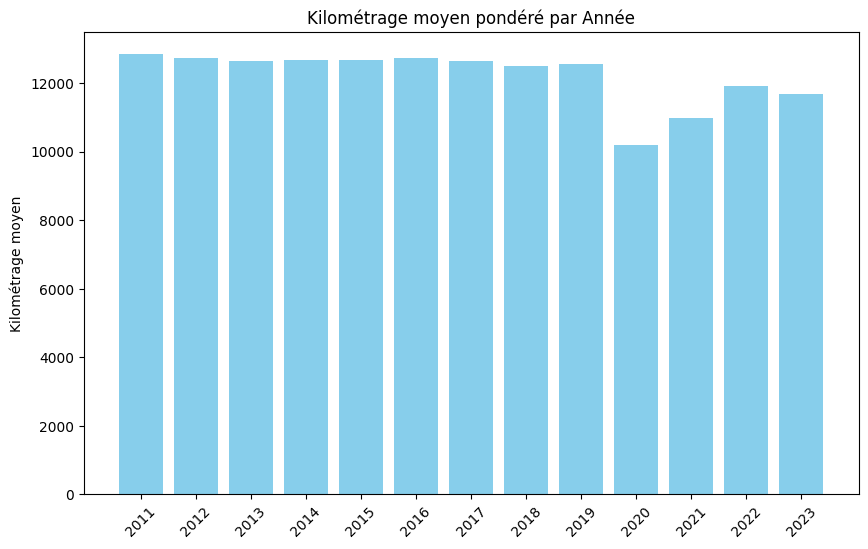

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour calculer les métriques
def compute_metrics_années(groupby_var):
    df_grouped = df_final.groupby(groupby_var).apply(
        lambda x: pd.Series({
            "Kilométrage total pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum(),
            "Kilométrage moyen pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum() / x["Nombre de véhicules"].sum()
        })
    ).reset_index()
    return df_grouped.sort_values(groupby_var)  # Trier par la variable de regroupement

# ========================== 1️⃣ Histogramme par Année ==========================
df_annee = compute_metrics_années("Année")

plt.figure(figsize=(10, 6))
plt.bar(df_annee["Année"], df_annee["Kilométrage moyen pondéré"], color='skyblue')
plt.title("Kilométrage moyen pondéré par Année")
plt.ylabel("Kilométrage moyen")
plt.xticks(rotation=45)
plt.show()


C:\Users\louak\AppData\Local\Temp\ipykernel_15848\1028622418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_final.groupby(groupby_var).apply(


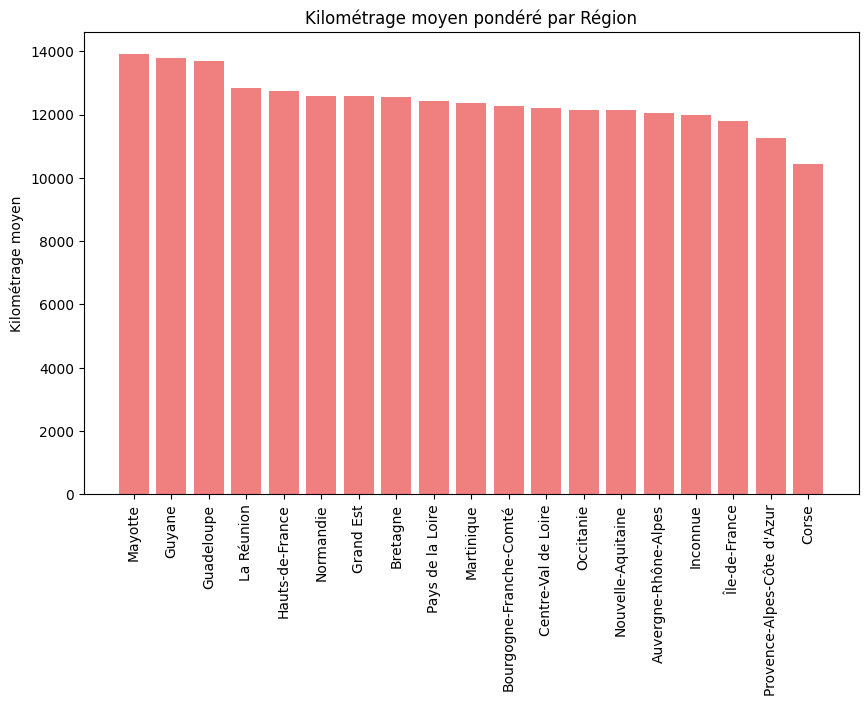

In [88]:

# ========================== 2️⃣ Histogramme par Région ==========================
df_region = compute_metrics("Région de résidence")

plt.figure(figsize=(10, 6))
plt.bar(df_region["Région de résidence"], df_region["Kilométrage moyen pondéré"], color='lightcoral')
plt.title("Kilométrage moyen pondéré par Région")
plt.ylabel("Kilométrage moyen")
plt.xticks(rotation=90)
plt.show()

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\1028622418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_final.groupby(groupby_var).apply(


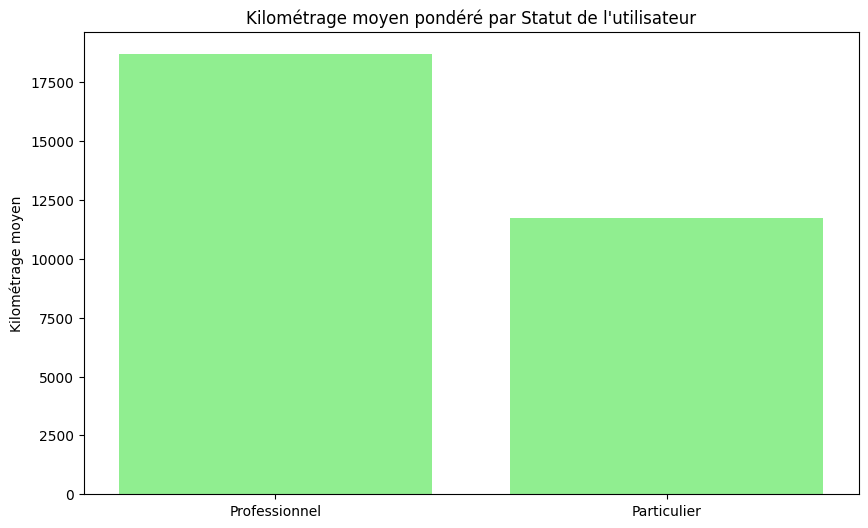

In [89]:

# ========================== 3️⃣ Histogramme par Statut d'utilisateur ==========================
df_statut = compute_metrics("Statut de l'utilisateur")

plt.figure(figsize=(10, 6))
plt.bar(df_statut["Statut de l'utilisateur"], df_statut["Kilométrage moyen pondéré"], color='lightgreen')
plt.title("Kilométrage moyen pondéré par Statut de l'utilisateur")
plt.ylabel("Kilométrage moyen")
plt.show()

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\1028622418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_final.groupby(groupby_var).apply(


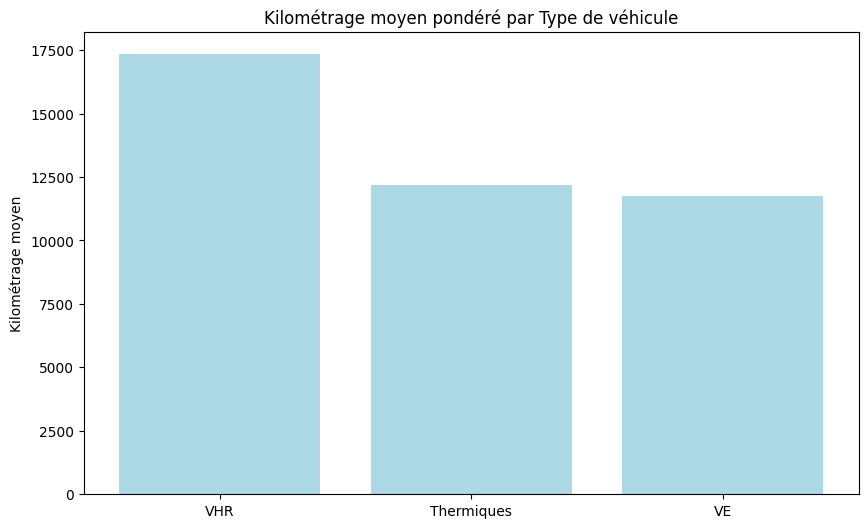

In [90]:

# ========================== 4️⃣ Histogramme par Type de véhicule ==========================
df_vehicule = compute_metrics("Type de véhicule")

plt.figure(figsize=(10, 6))
plt.bar(df_vehicule["Type de véhicule"], df_vehicule["Kilométrage moyen pondéré"], color='lightblue')
plt.title("Kilométrage moyen pondéré par Type de véhicule")
plt.ylabel("Kilométrage moyen")
plt.show()

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurer que les colonnes sont bien numériques
df_final["Kilométrage"] = pd.to_numeric(df_final["Kilométrage"], errors="coerce")
df_final["Nombre de véhicules"] = pd.to_numeric(df_final["Nombre de véhicules"], errors="coerce")
df_final["Année"] = pd.to_numeric(df_final["Année"], errors="coerce")

# Fonction pour calculer le kilométrage moyen pondéré selon l'année et une autre catégorie
def compute_metrics(groupby_vars):
    return df_final.groupby(groupby_vars).apply(
        lambda x: pd.Series({
            "Kilométrage moyen pondéré": (x["Kilométrage"] * x["Nombre de véhicules"]).sum() / x["Nombre de véhicules"].sum()
        })
    ).reset_index()

# Calcul de la moyenne globale du kilométrage moyen pondéré par année
df_global = df_final.groupby("Année").apply(
    lambda x: (x["Kilométrage"] * x["Nombre de véhicules"]).sum() / x["Nombre de véhicules"].sum()
).reset_index(name="Kilométrage moyen pondéré")

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2339131680.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_global = df_final.groupby("Année").apply(


C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2339131680.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_final.groupby(groupby_vars).apply(


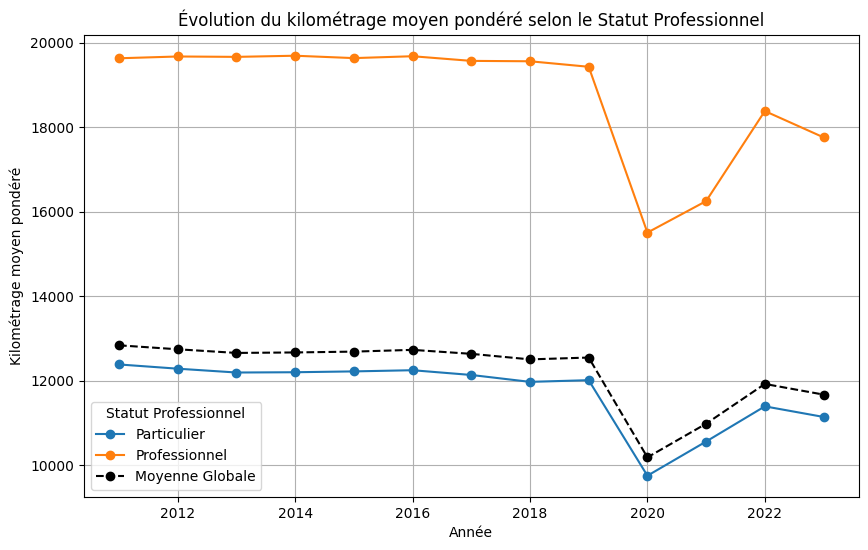

In [92]:

# ========================== 1️⃣ Kilométrage selon le statut professionnel ==========================
df_statut = compute_metrics(["Année", "Statut de l'utilisateur"])

plt.figure(figsize=(10, 6))
for statut in df_statut["Statut de l'utilisateur"].unique():
    subset = df_statut[df_statut["Statut de l'utilisateur"] == statut]
    plt.plot(subset["Année"], subset["Kilométrage moyen pondéré"], marker='o', linestyle='-', label=statut)

# Ajout de la courbe de moyenne globale (noir)
plt.plot(df_global["Année"], df_global["Kilométrage moyen pondéré"], color='black', marker='o', linestyle='--', label="Moyenne Globale")

plt.title("Évolution du kilométrage moyen pondéré selon le Statut Professionnel")
plt.xlabel("Année")
plt.ylabel("Kilométrage moyen pondéré")
plt.legend(title="Statut Professionnel")
plt.grid(True)
plt.show()

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2339131680.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_final.groupby(groupby_vars).apply(


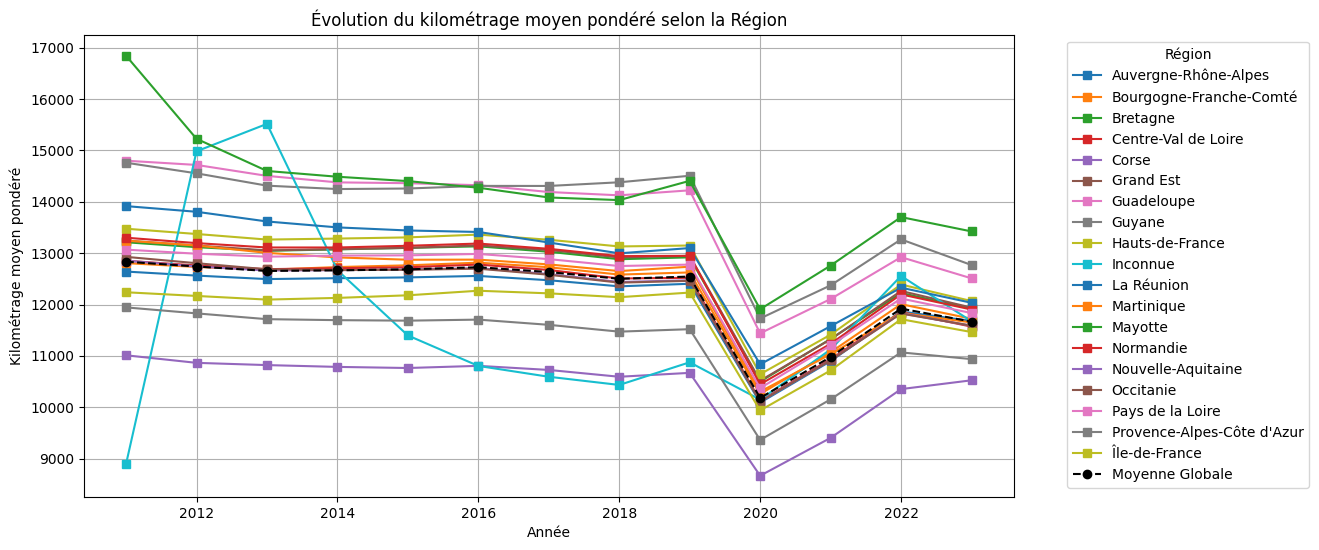

In [93]:

# ========================== 2️⃣ Kilométrage selon la région ==========================
df_region = compute_metrics(["Année", "Région de résidence"])

plt.figure(figsize=(12, 6))
for region in df_region["Région de résidence"].unique():
    subset = df_region[df_region["Région de résidence"] == region]
    plt.plot(subset["Année"], subset["Kilométrage moyen pondéré"], marker='s', linestyle='-', label=region)

# Ajout de la courbe de moyenne globale (noir)
plt.plot(df_global["Année"], df_global["Kilométrage moyen pondéré"], color='black', marker='o', linestyle='--', label="Moyenne Globale")

plt.title("Évolution du kilométrage moyen pondéré selon la Région")
plt.xlabel("Année")
plt.ylabel("Kilométrage moyen pondéré")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2339131680.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_final.groupby(groupby_vars).apply(


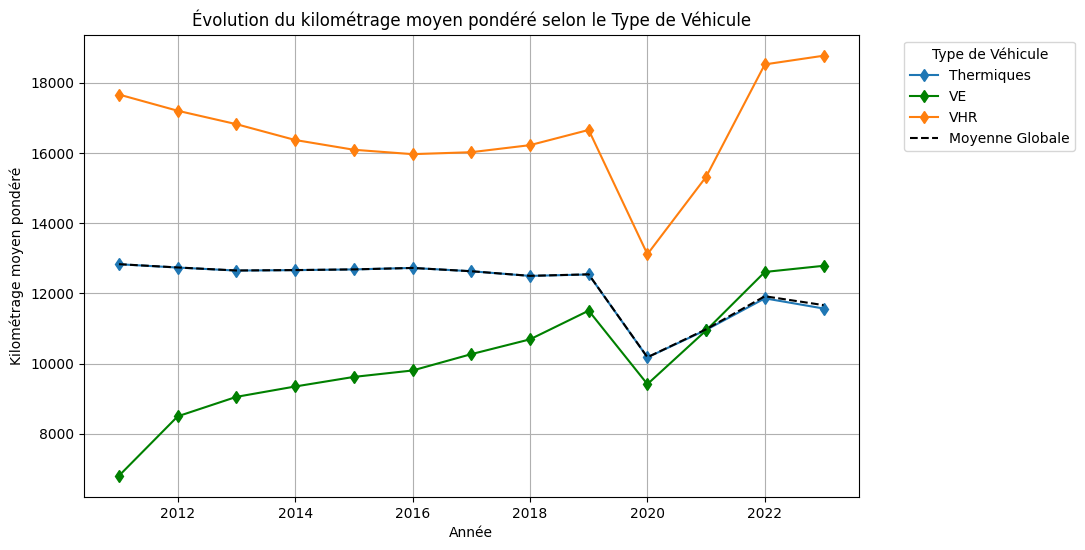

In [94]:

# ========================== 3️⃣ Kilométrage selon le type de véhicule ==========================
df_vehicule = compute_metrics(["Année", "Type de véhicule"])

plt.figure(figsize=(10, 6))
for vehicule in df_vehicule["Type de véhicule"].unique():
    subset = df_vehicule[df_vehicule["Type de véhicule"] == vehicule]
    color = "green" if vehicule == "VE" else None  # Met en vert uniquement la courbe des VE
    plt.plot(subset["Année"], subset["Kilométrage moyen pondéré"], marker='d', linestyle='-', label=vehicule, color=color)

# Ajout de la courbe de moyenne globale (noir)
plt.plot(df_global["Année"], df_global["Kilométrage moyen pondéré"], color='black', linestyle='--', label="Moyenne Globale")

plt.title("Évolution du kilométrage moyen pondéré selon le Type de Véhicule")
plt.xlabel("Année")
plt.ylabel("Kilométrage moyen pondéré")
plt.legend(title="Type de Véhicule", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [95]:
df_final.columns

Index(['Année', 'Région de résidence', 'Statut de l'utilisateur', 'Carburant',
       'Nombre de véhicules', 'Kilométrage', 'Type de véhicule'],
      dtype='object')

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2600236563.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_final.groupby('Région de résidence').apply(
C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2600236563.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_final.groupby(['Région de résidence', 'Type de véhicule']).apply(


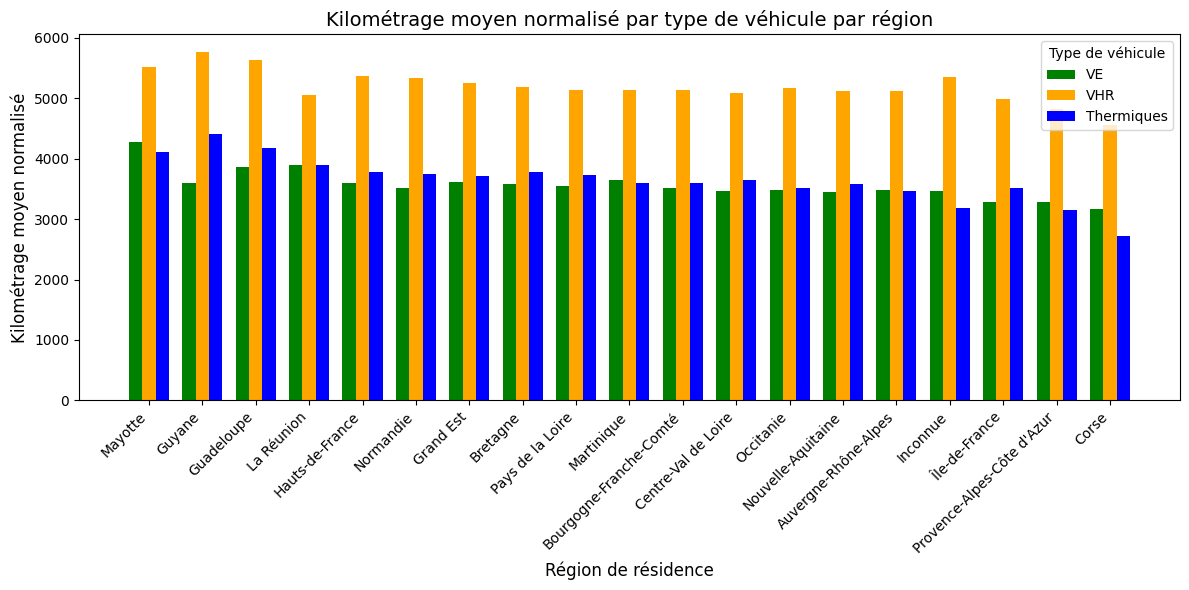

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Calcul du kilométrage moyen total par région
kilometrage_moyen_total = df_final.groupby('Région de résidence').apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
)

# 2. Calcul du kilométrage moyen par région et type de véhicule
kilometrage_moyen_par_vehicule = df_final.groupby(['Région de résidence', 'Type de véhicule']).apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
).unstack()

# 3. Normaliser les valeurs pour chaque région
for region in kilometrage_moyen_par_vehicule.index:
    total_region = kilometrage_moyen_total[region]  
    region_data = kilometrage_moyen_par_vehicule.loc[region]
    normalized_data = (region_data / region_data.sum()) * total_region
    kilometrage_moyen_par_vehicule.loc[region] = normalized_data

# 4. Trier les régions par kilométrage moyen total
sorted_regions = kilometrage_moyen_total.sort_values(ascending=False).index
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_regions]

# 5. Réorganiser l'ordre des colonnes pour assurer l'affichage correct
column_order = ['VE', 'VHR', 'Thermiques']  # Ordre souhaité des types de véhicules
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]

# 6. Création du graphique avec barres côte à côte
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(sorted_regions))  # Indices des régions
width = 0.25  # Largeur des barres

# Définir les couleurs pour chaque type de véhicule
colors = ['green', 'orange', 'blue']

# Dessiner chaque barre séparément
for i, col in enumerate(column_order):
    ax.bar(x + i * width, kilometrage_moyen_par_vehicule_sorted[col], width=width, label=col, color=colors[i])

# Ajouter les titres et légendes
ax.set_xticks(x + width)  # Centrer les labels sur l'axe X
ax.set_xticklabels(sorted_regions, rotation=45, ha='right')
ax.set_title('Kilométrage moyen normalisé par type de véhicule par région', fontsize=14)
ax.set_xlabel('Région de résidence', fontsize=12)
ax.set_ylabel('Kilométrage moyen normalisé', fontsize=12)
ax.legend(title="Type de véhicule")

# Afficher le graphique
plt.tight_layout()
plt.show()


faire un graphe en haut à gauche pro, 2018; en haut à droite pro 2024; en bas à gauche particulier 2018; en bas à droite particulier 2024

C:\Users\louak\AppData\Local\Temp\ipykernel_15848\4060196174.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_final.groupby('Région de résidence').apply(
C:\Users\louak\AppData\Local\Temp\ipykernel_15848\4060196174.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_statut = df_final.groupby(['Région de résidence', 'Statut de l\'utilisateur']).apply(


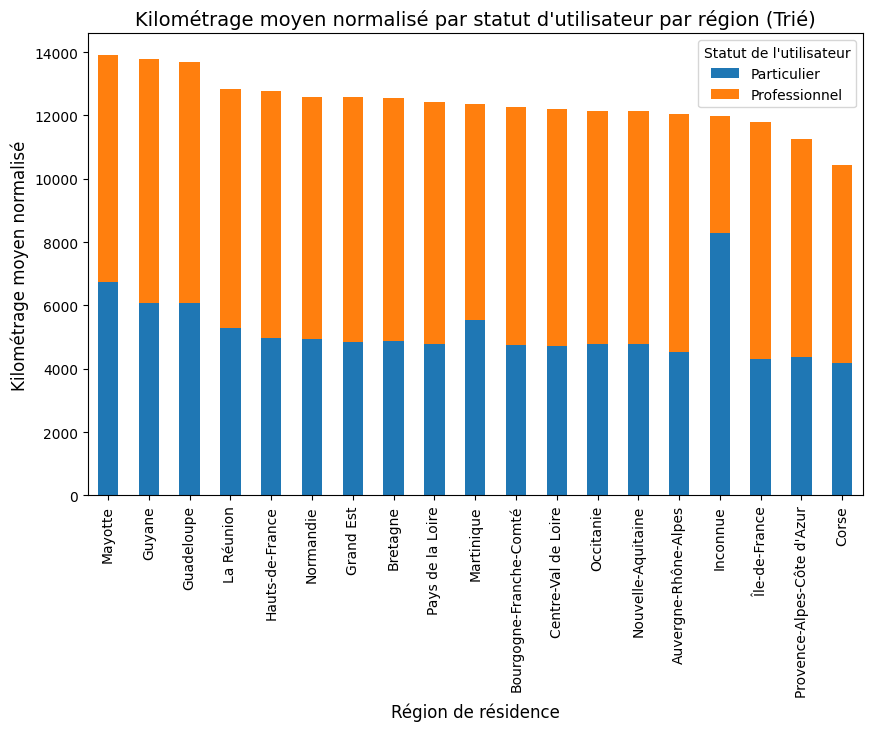

In [97]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par région
kilometrage_moyen_total = df_final.groupby('Région de résidence').apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
)

# 2. Calcul du kilométrage moyen par région et statut de l'utilisateur
kilometrage_moyen_par_statut = df_final.groupby(['Région de résidence', 'Statut de l\'utilisateur']).apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
).unstack(level='Statut de l\'utilisateur')

# 3. Normaliser les valeurs : pour chaque région, ajuster la somme des segments à la moyenne totale
for region in kilometrage_moyen_par_statut.index:
    total_region = kilometrage_moyen_total[region]  # Moyenne totale pour cette région
    region_data = kilometrage_moyen_par_statut.loc[region]
    normalized_data = (region_data / region_data.sum()) * total_region
    kilometrage_moyen_par_statut.loc[region] = normalized_data

# 4. Trier les régions par leur moyenne totale (par exemple, en ordre décroissant)
sorted_regions = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données de kilometrage_moyen_par_statut pour suivre l'ordre trié des régions
kilometrage_moyen_par_statut_sorted = kilometrage_moyen_par_statut.loc[sorted_regions]

# 5. Créer un histogramme empilé normalisé par statut d'utilisateur
ax = kilometrage_moyen_par_statut_sorted.plot(kind='bar', stacked=True, figsize=(10, 6))

# 6. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par statut d\'utilisateur par région (Trié)', fontsize=14)
plt.xlabel('Région de résidence', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)

# 7. Afficher le graphique
plt.show()


C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2365437478.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_statut = df_final.groupby(['Statut de l\'utilisateur']).apply(
C:\Users\louak\AppData\Local\Temp\ipykernel_15848\2365437478.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_statut_vehicule = df_final.groupby(['Statut de l\'utilisateur', 'Type de véhi

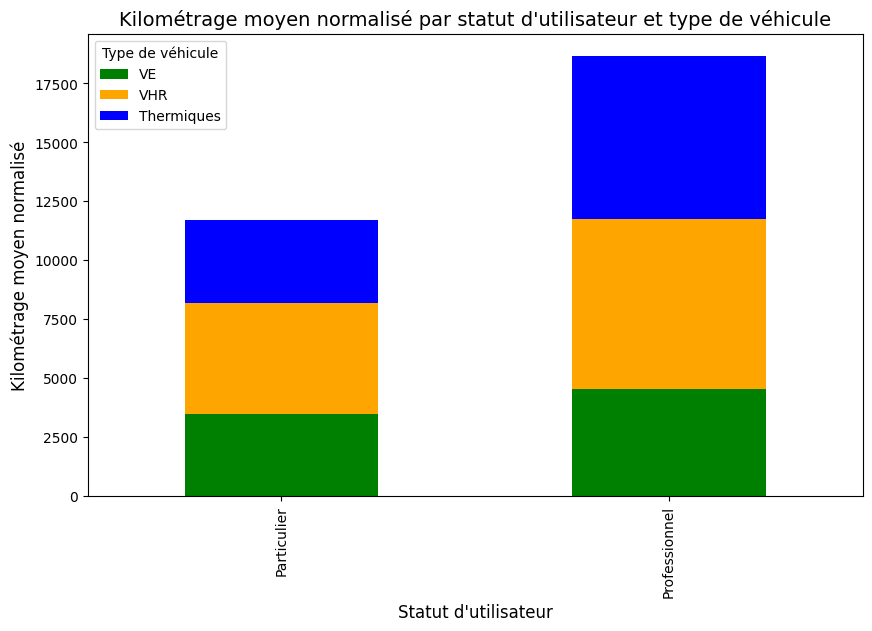

In [98]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par statut d'utilisateur
kilometrage_moyen_par_statut = df_final.groupby(['Statut de l\'utilisateur']).apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
)

# 2. Calcul du kilométrage moyen par statut d'utilisateur et type de véhicule
kilometrage_moyen_par_statut_vehicule = df_final.groupby(['Statut de l\'utilisateur', 'Type de véhicule']).apply(
    lambda x: (x['Kilométrage'] * x['Nombre de véhicules']).sum() / x['Nombre de véhicules'].sum()
).unstack(level='Type de véhicule')

# 3. Normaliser les valeurs par statut d'utilisateur
for statut in kilometrage_moyen_par_statut_vehicule.index:
    statut_data = kilometrage_moyen_par_statut_vehicule.loc[statut]
    total_statut = kilometrage_moyen_par_statut.loc[statut]
    normalized_data = (statut_data / statut_data.sum()) * total_statut
    kilometrage_moyen_par_statut_vehicule.loc[statut] = normalized_data

# 4. Spécifier les couleurs pour chaque type de véhicule dans le bon ordre
# On suppose que les types de véhicules sont "VE", "VHR" et "Thermiques", mais l'ordre des colonnes dans le DataFrame
# pourrait ne pas être le bon, donc je m'assure de respecter l'ordre VE, VHR, Thermiques
# Si ce n'est pas le cas, il faudra trier les colonnes correctement.

# On récupère les colonnes (types de véhicules) et les réorganise dans l'ordre souhaité
column_order = ['VE', 'VHR', 'Thermiques']
kilometrage_moyen_par_statut_vehicule = kilometrage_moyen_par_statut_vehicule[column_order]

# On associe les couleurs comme suit :
colors = ['green', 'orange', 'blue']  # VE (vert), VHR (orange), Thermiques (bleu)

# 5. Créer un graphique empilé par type de véhicule avec les couleurs spécifiées
ax = kilometrage_moyen_par_statut_vehicule.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# 6. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par statut d\'utilisateur et type de véhicule', fontsize=14)
plt.xlabel('Statut d\'utilisateur', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)

# 7. Afficher le graphique
plt.show()
